In [2]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt


In [3]:
metrics = ['blocks-size', 'avg-block-size', 'n-transactions-total',
           'hash-rate', 'difficulty', 'transaction-fees-usd',
           'n-unique-addresses', 'n-transactions', 'my-wallet-n-users',
           'utxo-count', 'n-transactions-excluding-popular', 'estimated-transaction-volume-usd',
           'trade-volume', 'total-bitcoins', 'market-price']

years = [2020]

In [4]:
df_all = pd.DataFrame()
for m in metrics:
  append_data = []
  for y in years:
      ts = datetime.datetime(
          y, 12, 31, tzinfo=datetime.timezone.utc).timestamp()
      print('https://api.blockchain.info/charts/'+m +
          '?timespan=1year&rollingAverage=24hours&format=csv&start='+str(int(ts)))
      df = pd.read_csv('https://api.blockchain.info/charts/'+m+'?timespan=1year&rollingAverage=24hours&format=csv&start='+str(
          int(ts)), names=['date', m], parse_dates=[0], index_col=[0])
      append_data.append(df)
  df_m = pd.concat(append_data)
  df_m.index = df_m.index.normalize()
  df_m = df_m.groupby([pd.Grouper(freq='D')]).mean()

  if df_all.shape[0] == 0:
      print(m)
      print(df_m.shape)
      df_all = df_m
  else:
      print(m)
      print(df_m.shape)
      print(df_all.shape)
      df_all = df_all.merge(df_m, on="date", how="outer")

https://api.blockchain.info/charts/blocks-size?timespan=1year&rollingAverage=24hours&format=csv&start=1609372800
blocks-size
(365, 1)
https://api.blockchain.info/charts/avg-block-size?timespan=1year&rollingAverage=24hours&format=csv&start=1609372800
avg-block-size
(365, 1)
(365, 1)
https://api.blockchain.info/charts/n-transactions-total?timespan=1year&rollingAverage=24hours&format=csv&start=1609372800
n-transactions-total
(365, 1)
(365, 2)
https://api.blockchain.info/charts/hash-rate?timespan=1year&rollingAverage=24hours&format=csv&start=1609372800
hash-rate
(365, 1)
(365, 3)
https://api.blockchain.info/charts/difficulty?timespan=1year&rollingAverage=24hours&format=csv&start=1609372800
difficulty
(365, 1)
(365, 4)
https://api.blockchain.info/charts/transaction-fees-usd?timespan=1year&rollingAverage=24hours&format=csv&start=1609372800
transaction-fees-usd
(365, 1)
(365, 5)
https://api.blockchain.info/charts/n-unique-addresses?timespan=1year&rollingAverage=24hours&format=csv&start=160937

In [5]:
df_all["price"] = df_all["market-price"]
df_all.drop(["market-price"], axis=1, inplace=True)

In [5]:
df_all.describe().transpose()

count          mean           std  \
blocks-size                       365.0  3.520196e+05  1.811439e+04   
avg-block-size                    365.0  1.223811e+00  1.677949e-01   
n-transactions-total              365.0  6.521946e+08  2.715717e+07   
hash-rate                         365.0  1.452145e+08  2.529074e+07   
difficulty                        365.0  2.032491e+13  2.985021e+12   
transaction-fees-usd              365.0  2.809420e+06  2.907147e+06   
n-unique-addresses                365.0  6.802509e+05  1.067178e+05   
n-transactions                    365.0  2.679355e+05  4.552401e+04   
my-wallet-n-users                 365.0  7.366897e+07  4.486738e+06   
utxo-count                        365.0  7.555210e+07  2.236255e+06   
n-transactions-excluding-popular  365.0  2.651726e+05  4.495082e+04   
estimated-transaction-volume-usd  362.0  5.249196e+09  2.407667e+09   
trade-volume                      365.0  5.750479e+08  4.055259e+08   
total-bitcoins                    365.0  1.874961e+07  9.412537e+04   
price                             365.0  4.738575e+04  9.827076e+03   

                                           min           25%           50%  \
blocks-size                       3.191140e+05  3.368599e+05  3.527405e+05   
avg-block-size                    7.645612e-01  1.141141e+00  1.287554e+00   
n-transactions-total              6.015778e+08  6.302773e+08  6.528541e+08   
hash-rate                         5.846100e+07  1.299104e+08  1.492680e+08   
difficulty                        1.367259e+13  1.899764e+13  2.082353e+13   
transaction-fees-usd              3.243385e+05  6.561623e+05  1.228068e+06   
n-unique-addresses                3.790660e+05  6.035880e+05  6.797520e+05   
n-transactions                    1.246400e+05  2.332780e+05  2.707360e+05   
my-wallet-n-users                 6.340114e+07  7.064877e+07  7.452516e+07   
utxo-count                        6.928811e+07  7.549226e+07  7.609560e+07   
n-transactions-excluding-popular  1.230130e+05  2.301210e+05  2.681470e+05   
estimated-transaction-volume-usd  1.052595e+09  3.412821e+09  4.984085e+09   
trade-volume                      1.193756e+08  3.126001e+08  4.722206e+08   
total-bitcoins                    1.858616e+07  1.867040e+07  1.874554e+07   
price                             2.898256e+04  3.824009e+04  4.783398e+04   

                                           75%           max  
blocks-size                       3.670588e+05  3.829926e+05  
avg-block-size                    1.329867e+00  1.512784e+00  
n-transactions-total              6.745013e+08  6.991063e+08  
hash-rate                         1.641284e+08  1.985140e+08  
difficulty                        2.233566e+13  2.504649e+13  
transaction-fees-usd              4.717603e+06  1.690307e+07  
n-unique-addresses                7.540580e+05  9.524000e+05  
n-transactions                    2.974940e+05  4.017440e+05  
my-wallet-n-users                 7.707292e+07  8.019754e+07  
utxo-count                        7.660221e+07  7.930333e+07  
n-transactions-excluding-popular  2.934090e+05  3.974560e+05  
estimated-transaction-volume-usd  6.890188e+09  1.464262e+10  
trade-volume                      7.240613e+08  3.192479e+09  
total-bitcoins                    1.883014e+07  1.891472e+07  
price                             5.625148e+04  6.756217e+04

In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go




trace1 = go.Scatter(
    x=df_all.index,
    y=df_all['price'],
    mode='lines',
    name='Original Price'
            )
layout = dict(
    title='<b>Bitcoin Price</b>',
    yaxis=dict(title='<b>BTC Price (USD)</b>')
)
pdata = [trace1]
fig = dict(data=pdata, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

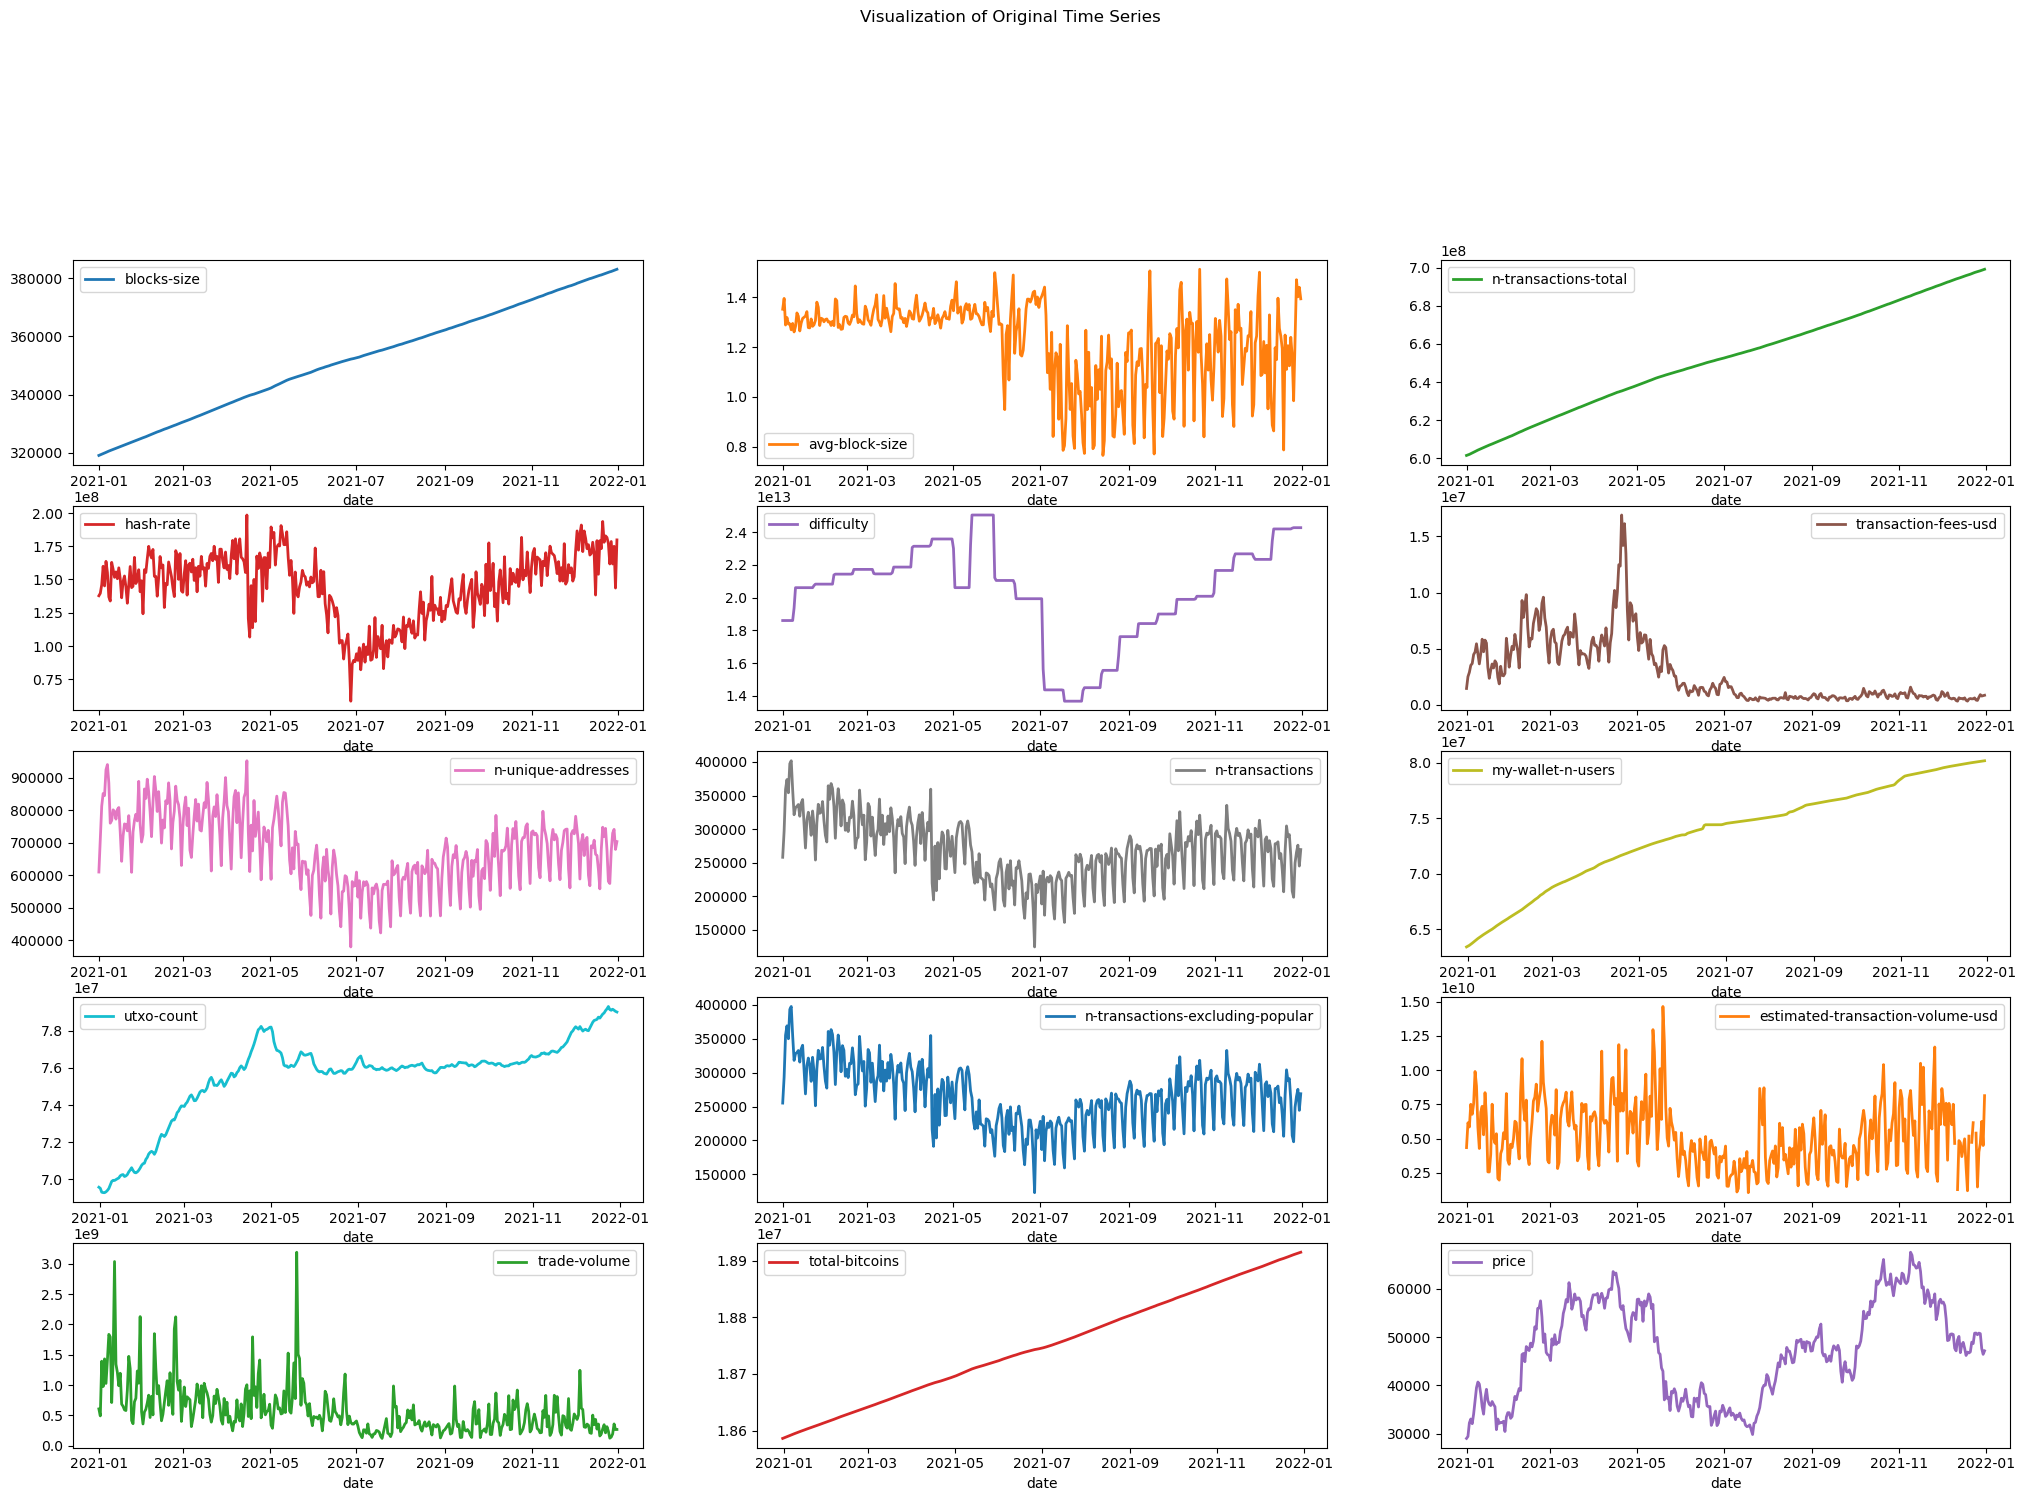

In [37]:
df_all.plot(subplots=True,
        layout=(8, 3),
        figsize=(25,25),
        fontsize=10,
        linewidth=2,
        sharex=False,
        title='Visualization of Original Time Series')
plt.savefig('Visualisation of Orignal Time Series Data.png')
plt.show()

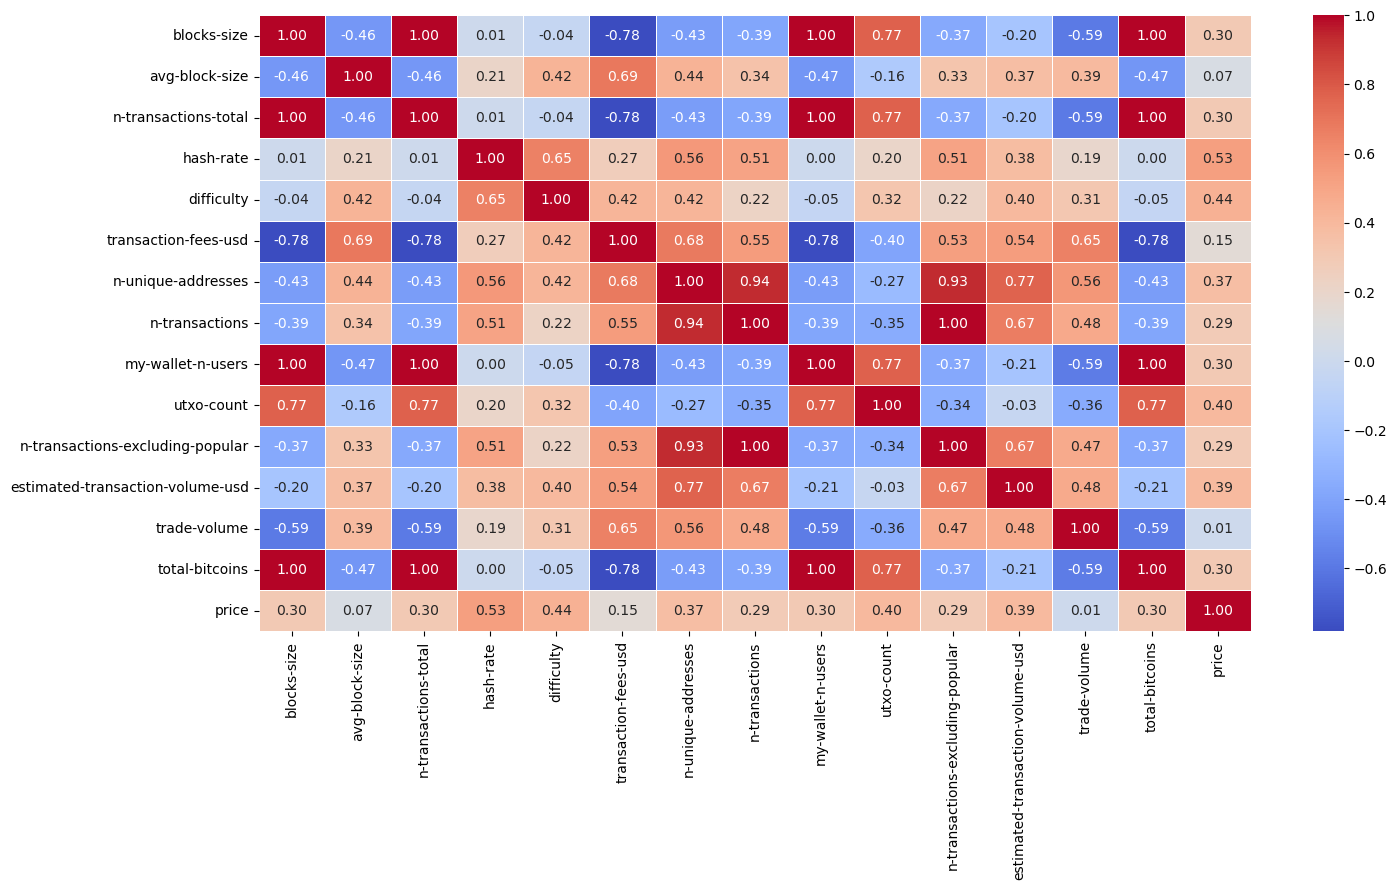

In [9]:
import seaborn as sns

corr_matrix = df_all.corr(method="spearman")
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('CorrelationChart.png')
plt.show()

In [10]:
n = len(df)
train_df = df_all[0:int(n*0.7)]
val_df = df_all[0:int(n*0.2)]
test_df = df_all[0:int(n*0.7)]

num_features = df_all.shape[1]

In [11]:
train_mean = train_df.mean()
train_sd = train_df.std()

train_df = (train_df - train_mean)/train_sd
val_df = (val_df - train_mean) / train_sd
test_df = (test_df - train_mean) / train_sd

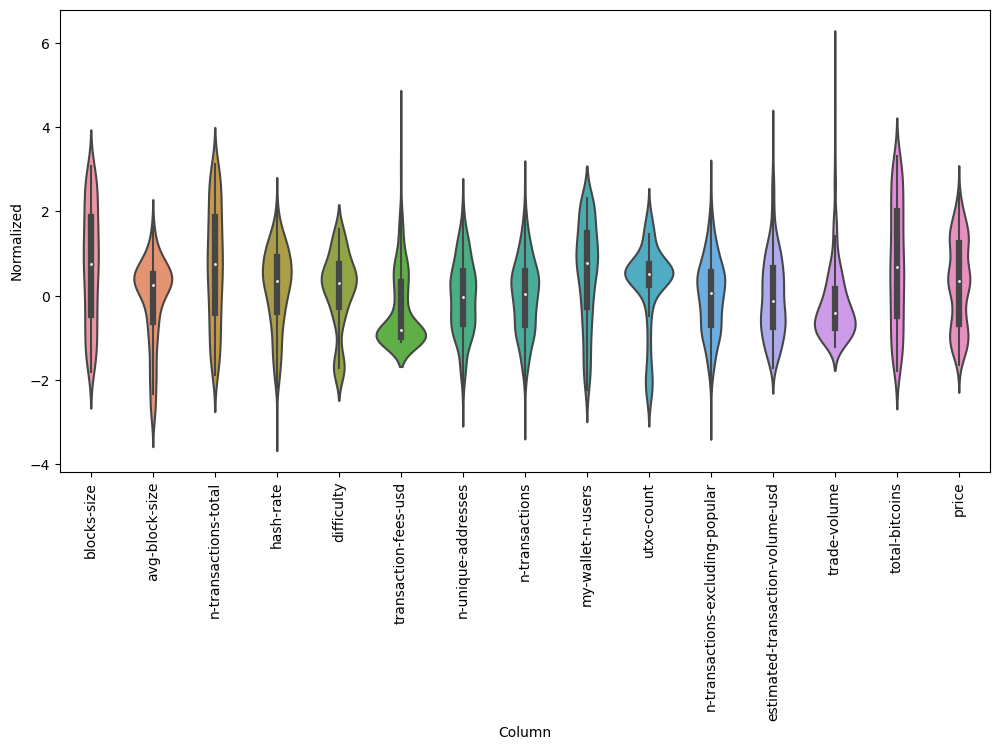

In [12]:
df_std = (df_all - train_mean) / train_sd
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_all.keys(), rotation=90)